<h2>Book Introduction to Evolutionary Computing, Second Edition</h2>

Example from chapter <b>3.3 An Evolutionary Cycle by Hand</b> - maximising the values of x<sup>2</sup> for integers in the range 0-31.
<br>
This notebook takes you step by step from

<ul>
  <li>initializing population (phenotypes)</li>
  <li>mapping to genotypes</li>
  <li>calculating fitness values</li>
  <li>calculating probability</li>
  <li>calculating expected count</li>
  <li>one-point crossover</li>
  <li>mutation</li>
  <li>calculating fitness values for offsprings</li>
  <li>comparison between initial population and offsprings</li>
</ul>  


In [1]:
%matplotlib inline
import random
import numpy as np
import math

#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

If you want to use phenotypes as in the book use constants. If you would like to generate your own initial population, comment out the list with constants and uncomment the list with randomly generated values.

In [2]:
number_of_genotypes = 4
number_of_genes = 5 #integers are in range 0-31, where max is 32 and in binary it takes 5 bits: 11111
phenotypes = [13, 24, 8, 19]
#phenotypes = random.sample(range(0, 31), number_of_genotypes)

In [3]:
def dex_to_bin(d):
    return bin(d).format(1)[2:].zfill(number_of_genes)

def bin_to_dex(b):
    return int(b, 2)

In [6]:
print("Initial population:", phenotypes)

genotypes = []

for ph in phenotypes:
   b = dex_to_bin(ph) 
   genotypes.append(b)
print("Corresponding genotypes:", genotypes)

Initial population: [13, 24, 8, 19]
Corresponding genotypes: ['01101', '11000', '01000', '10011']


<span style="color:green">Fitness</span>
<br>
Calculate fitness values with fitness function <b>f(x) = x<sup>2</sup></b> and print out sum, average and max.

In [10]:
def sum_avg_max(lov):
    s = sum(lov)
    a = round(np.mean(lov), 2)
    m = max(lov)
    return s, a, m

def fitness(phenotypes):
    fitness_values = list(map(lambda x: x**2, phenotypes))

    print("Fitness:", fitness_values)
    
    return fitness_values

init_pop_fitness_values = fitness(phenotypes)

init_pop_fitness_sum, init_pop_fitness_avg, init_pop_fitness_max = sum_avg_max(init_pop_fitness_values)
print("Sum:", init_pop_fitness_sum)
print("Avg:", int(math.ceil(init_pop_fitness_avg)))
print("Max:", init_pop_fitness_max)

Fitness: [169, 576, 64, 361]
Sum: 1170
Avg: 293
Max: 576


<span style="color:green">Probability</span>

In [13]:
def probability(lov, sum_val):
    return list(map(lambda x: round(x/float(sum_val), 3), lov))

probability_list = probability(init_pop_fitness_values, init_pop_fitness_sum)
print("Probability:", probability_list)

init_pop_prob_sum, init_pop_prob_avg, init_pop_prob_max = sum_avg_max(probability_list)

print ("Sum:", init_pop_prob_sum)
print("Avg:", init_pop_prob_avg)
print("Max:", init_pop_prob_max)

Probability: [0.144, 0.492, 0.055, 0.309]
Sum: 1.0
Avg: 0.25
Max: 0.492


<span style="color:green">Expected count</span>

In [17]:
def expected_count(lov, fitness_avg):
    return list(map(lambda x: round(x/float(fitness_avg), 2), lov))

expected_list = expected_count(init_pop_fitness_values, init_pop_fitness_avg)
print("Expected count:", expected_list)

init_pop_exp_sum, init_pop_exp_avg, init_pop_exp_max = sum_avg_max(expected_list)

print("Sum:", init_pop_exp_sum)
print("Avg:", init_pop_exp_avg)
print("Max:", init_pop_exp_max)

Expected count: [0.58, 1.97, 0.22, 1.23]
Sum: 4.0
Avg: 1.0
Max: 1.97


<span style="color:green">Mating pool</span>
<br>
Mating pool is populated from initial population based on probability each phenotype has to be selected as parent.

In [23]:
#generate genotypes using numerical distribution from probability_list
def random_genotype():
    return np.random.choice(np.array(phenotypes), p=probability_list)

phenotype_mating_pool = []
genotype_mating_pool = []

for x in range(number_of_genotypes):
    p = random_genotype()
    g = dex_to_bin(p)
    phenotype_mating_pool.append(p)
    genotype_mating_pool.append(g)

phenotype_mating_pool = [13, 24, 24, 19]
genotype_mating_pool = [str(bin(i))[2:] for i in phenotype_mating_pool]

print("Phenotype mating pool:", phenotype_mating_pool)
print("Genotype mating pool:", genotype_mating_pool)

Phenotype mating pool: [13, 24, 24, 19]
Genotype mating pool: ['1101', '11000', '11000', '10011']


Convert bit-strings to a list of genes for easier manipulation

In [24]:
list_of_genes = []
pair_numbering = []
#uses for calculating pair numbers
number_of_pairs = 0.5

print("List of pairs with corresponding genes:")
for g in genotype_mating_pool:
    number_of_pairs += .5
    pair_number = int(number_of_pairs)
    pair_numbering.append(pair_number)
    print("Pair", pair_number, list(g))
    list_of_genes.append(list(g))

number_of_pairs = int(number_of_pairs)    

print("Number of pairs:", number_of_pairs)

List of pairs with corresponding genes:
Pair 1 ['1', '1', '0', '1']
Pair 1 ['1', '1', '0', '0', '0']
Pair 2 ['1', '1', '0', '0', '0']
Pair 2 ['1', '0', '0', '1', '1']
Number of pairs: 2


<span style="color:green">Crossover point</span>

In [26]:
#crossover_point = random.randrange(1, number_of_binary_positions-1)
crossover_point = []
#create a list with crossover point, for both parents in each pair
for x in range(number_of_pairs):
    cp = random.randrange(1, number_of_genes-1)
    crossover_point.append(cp)
    crossover_point.append(cp)

crossover_point = [4,4,2,2]
print(crossover_point)

[4, 4, 2, 2]


<span style="color:green">Pairs in mating pool with crossover point</span>

In [27]:
print("Pairs with crossover point:")
for line in zip(pair_numbering, list_of_genes, crossover_point):
    print("Pair", line[0], "\b:", line[1], "\b, crossover point:", line[2])

Pairs with crossover point:
Pair 1 : ['1', '1', '0', '1'] , crossover point: 4
Pair 1 : ['1', '1', '0', '0', '0'] , crossover point: 4
Pair 2 : ['1', '1', '0', '0', '0'] , crossover point: 2
Pair 2 : ['1', '0', '0', '1', '1'] , crossover point: 2


<span style="color:green">Offsprings after one-point crossover</span>

In [28]:
head_genes = []
tail_genes = []
offspring_list = [] #list of list of genes
parent_1 = True
offspring_genotypes = [] #list of genotypes
offspring_phenotypes = [] #list of phenotypes

print("Head genes:")
for i in range(len(list_of_genes)):
    hg = list_of_genes[i][:crossover_point[i]]
    print(hg)
    head_genes.append(hg)

print("Tail genes:")
for i in range(len(list_of_genes)):
    tg = list_of_genes[i][crossover_point[i]:]
    print(tg)
    tail_genes.append(tg)

#switch tails of parents in same pair and concatenate genes into offsprings
for i in range(len(head_genes)):
    if parent_1:
        offspring_list.append(head_genes[i] + tail_genes[i+1])
        parent_1 = False
    else:
        offspring_list.append(head_genes[i] + tail_genes[i-1])
        parent_1 = True


for os in offspring_list:
    offspring_genotypes.append(''.join(os))
    
print("\nGenotypes after crossover:\n", offspring_genotypes)

#decoding to phenotypes
for og in offspring_genotypes:
    offspring_phenotypes.append(bin_to_dex(og))
    
print("\nPhenotypes after crossover:\n", offspring_phenotypes)

Head genes:
['1', '1', '0', '1']
['1', '1', '0', '0']
['1', '1']
['1', '0']
Tail genes:
[]
['0']
['0', '0', '0']
['0', '1', '1']

Genotypes after crossover:
 ['11010', '1100', '11011', '10000']

Phenotypes after crossover:
 [26, 12, 27, 16]


<span style="color:green">Fitness</span>
<br>
Return fitness of offsprings

In [29]:
fitness_offspring = fitness(offspring_phenotypes)

fitness_sum, fitness_avg, fitness_max = sum_avg_max(fitness_offspring)
print("Sum:", fitness_sum)
print("Avg:", int(math.ceil(fitness_avg)))
print("Max:", fitness_max)

Fitness: [676, 144, 729, 256]
Sum: 1805
Avg: 452
Max: 729


<span style="color:green">Mutation probability</span>
<br>
Only one gene should mutate (bit be flipped) per mutation.

In [30]:
#function creates a list with values either 0 or 1. If value is 1 at a certain position, that position in chromosome is swapped.
def mutate_gene_list(no_of_genes):
    #mutation rate is usually 1/number_of_genes
    mutation_rate = 1./no_of_genes
    
    swap_gene_yes_no = list([0,1]) #possible values 0-do not swap, 1-swap gene
    p_list = list([1-mutation_rate, mutation_rate]) #probability list for the 0 or 1 to happen
    
    print("Mutation rate (1/number of genes):", mutation_rate)
    
    mutation_probability = [] #list for values which determine whether or not a gene will be swapped.
    mutation_count = 0 #count number of mutations to be applied
    index_of_mutation = -1
    
    for i in range(no_of_genes):
        #check if we can still mutate a bit (meaning none of the positions have value 1 in the mutation probability)
        if mutation_count == 0: 
            mute = np.random.choice(np.array(swap_gene_yes_no), p=p_list)
        else:
            mute = 0
        mutation_probability.append(mute)
        #if random function returns 1 then rest of the places in mutation_probability are 0
        if mute == 1:
            mutation_count += 1
        
    print("Mutation probability:", mutation_probability)
    
    if 1 in mutation_probability:
         index_of_mutation = mutation_probability.index(1)
    
    print("Gene index to mutate (if -1 then none):", index_of_mutation)
    return mutation_probability, index_of_mutation

<span style="color:green">Mutation</span>
<br>
Mutation on offsprings which are the result of one-point crossover

In [32]:
#swap gene - 1->0 or 0->1
def swap_gene(gene):
    if gene == "0":
        print("0->1")
        return 1
    else:
    #elif gene == "1": 
        print("1->0")
        return 0

genotype_after_mutation = []
        
for os in offspring_list:
    l, i = mutate_gene_list(number_of_genes)
    os_np = np.array(os)
    if i != -1:
        os_np[i] = swap_gene(os_np[i])
    #create a bit-string out of list of genes
    genotype = ''.join(os_np)
    genotype_after_mutation.append(genotype)

Mutation rate (1/number of genes): 0.2
Mutation probability: [0, 0, 0, 0, 0]
Gene index to mutate (if -1 then none): -1
Mutation rate (1/number of genes): 0.2
Mutation probability: [0, 0, 1, 0, 0]
Gene index to mutate (if -1 then none): 2
0->1
Mutation rate (1/number of genes): 0.2
Mutation probability: [0, 0, 0, 1, 0]
Gene index to mutate (if -1 then none): 3
1->0
Mutation rate (1/number of genes): 0.2
Mutation probability: [0, 0, 0, 0, 0]
Gene index to mutate (if -1 then none): -1


In [36]:
print("Offspring after mutation in genotype form:", genotype_after_mutation)
phenotype_after_xover_mutation =  list(map(lambda x: bin_to_dex(x), genotype_after_mutation))
print("Offspring after mutation in phenotype form:",phenotype_after_xover_mutation)

Offspring after mutation in genotype form: ['11010', '1110', '11001', '10000']
Offspring after mutation in phenotype form: [26, 14, 25, 16]


<span style="color:green">Fitness values</span>
<br>
Fitness values of offsprings after one-point crossover and mutation

In [37]:
final_fitness_values = fitness(phenotype_after_xover_mutation)

#print fitness_values

final_fitness_sum, final_fitness_avg, final_fitness_max = sum_avg_max(final_fitness_values)

Fitness: [676, 196, 625, 256]


<span style="color:green">Interpretation of results</span>

In [38]:
print("Initial population:\n\t", phenotypes)
print("Fitness:\n\t", init_pop_fitness_values)
print("Sum:", init_pop_fitness_sum)
print("Avg:", int(math.ceil(init_pop_fitness_avg)))
print("Max:", init_pop_fitness_max)

print("-------------------")

print("Final offspring: \n\t", phenotype_after_xover_mutation)
print("Fitness:\n\t", final_fitness_values)
print("Sum:", final_fitness_sum)
print("Avg:", int(math.ceil(final_fitness_avg)))
print("Max:", final_fitness_max)

Initial population:
	 [13, 24, 8, 19]
Fitness:
	 [169, 576, 64, 361]
Sum: 1170
Avg: 293
Max: 576
-------------------
Final offspring: 
	 [26, 14, 25, 16]
Fitness:
	 [676, 196, 625, 256]
Sum: 1753
Avg: 439
Max: 676


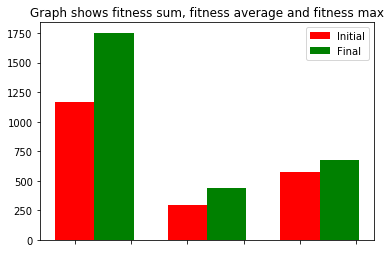

In [44]:
width = 0.35
N = 3
ind = np.arange(N)  # the x locations for the groups
fig, ax = plt.subplots()
rects1 = ax.bar(ind, [init_pop_fitness_sum, int(math.ceil(init_pop_fitness_avg)), init_pop_fitness_max], width=width, color='r')
rects2 = ax.bar(ind + width, [final_fitness_sum, int(math.ceil(final_fitness_avg)), final_fitness_max], width=width, color='g')
ax.set_title("Graph shows fitness sum, fitness average and fitness max")
ax.legend((rects1[0], rects2[0]), ('Initial', 'Final'))
ax.set_xticklabels(('', '', ''))
plt.show()